## 시계열 예측

### Preview

- 정의: 시간 순서대로 발생한 데이터의 수열

- 수식: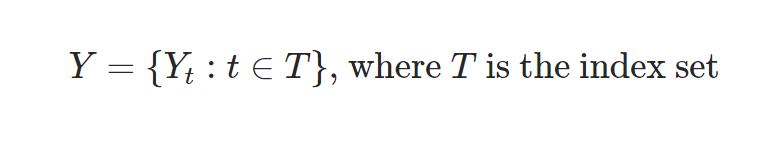

- 전제 조건: 
    
    - 과거의 데이터에 일정한 패턴 발견
    
    - 과거의 패턴은 미래에도 동일하게 반복
    
    - 즉, 안정적 데이터에 대해서만 미래 예측이 가능
    
    - 시계열 데이터의 통계적 특성이 변하지 않는다.
    
    
    
### Stationary

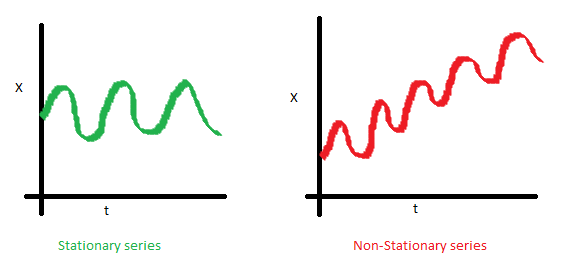

- 일정 조건

    - 평균
    
    - 분산
    
    - 공분산
    
- Covariance

    - 변수의 단위 크기에 영향을 받는다
    
    - 값자체가 두 변수 간의 상관성 대표 안함
    
    - 두 확률 변수가 독립이면 0 값을 갖는다.
   
    - 안정적인 시계열에서 시차 h가 같다면 데이터의 상관성이 동일 주기를 나타냄
    
    - t에 무관해야한다.
    
    - Correlation: Covariance를 Normalize하여 [-1,1] 사이의 값으로 표현되도록 보정, 두 확률 변수가 독립일 경우 0의 값을 갖는다
    
    
### Stationary 여부 체크


#### Augmented Dickey-Fuller Test

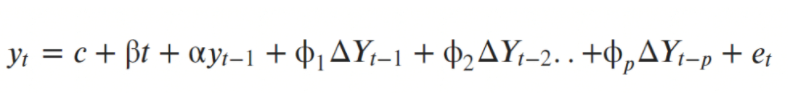

1. 주어진 시계열 데이터의 안정성이 없다는 귀무 가설 세움

2. 통계적 가설 검정 과정을 통해 귀무가설 기각

3. 안정적인 데이터라는 대립가설 채택

- 즉, 기무가설 기각이 되면 안정적인 시계열데이터지만 아니라면 그렇지 않다.

#### 유의 확률 (p-값)

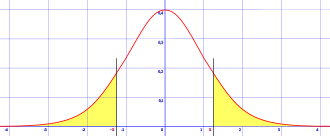

- 정의: 귀무 가설 맞다는 결과 < 실제 결과

--> 귀무가설의 가정이 틀렸다는 것을 방증

- 값이 <0.05 , p-value만큼 오류 가능성 하에 귀무가설 기각하고 대립가설 채택

#### Stasmodels 패키지와 adfuller메소드

1. statsmodels 패키지

- R에서 제공하는 통계검정, 시계열 분석 등의 기능을 파이썬에서도 이용하게 도움을 주는 통계 패키지

- adfuller메소드: 주어진 timeseries에 대한 Augmented Dickey-Fuller Test 수행 코드


#### 아이디어: Make Stationary

1. 안정적인 특성을 갖도록 기존의 시계열 데이터 가공

- 1-1. 로그 함수 변환

   - 추이에 따라 분산이 커지는데 p-value가 절반 이상 줄어들고 분산이 일정해진다.
   
- 1-2. Moving average 제거- 추세 상쇄하기

   - 시간 추이에 따라 나타나는 평균값 변화 추세
   
   - 추세제거: 거꾸로 Moving Average(rolling mean) -ts_log
   
   
- 1-3. 차분(Differencing) - 계절성(Seasonality) 상쇄하기

   - Trend에 잡히진 않으나 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화.
   
   - 예측에 방해가 되는 불안정요소
   
   - Moving Average제거로 상쇄 안된다.
   
   - 계절적, 주기적 패턴
   
   - 시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼준다.
   
   - 현재 스탭 - 직전 스탭 : 이번 스텝에서 발생한 변화량 의미
   
   
2. 시계열 분해 기술 적용

- seasonal_decompose 메소드: 시계열 안에 존재하는 trend, seasonality를 직접 분리한다.

- moving average제거, differencing등을 거치지 않아도 안정적인 시계열 만든다.

- 순서
    
    - 로그 변환 단계(ts_log)
    
    - Original 시계열, Trend 와 Seasonality 제거 후 나머지 residual (Decomposing)
    
    - get a low p-value
    
    

## ARIMA모델 

### ARIMA모델 정의

- AR(Autoregressive) + I(Integrated) + MA(Moving Average)

- 시계열 데이터 예측 모델을 자동적으로 만든다.

1. AR(자기회귀, Autoregressinve)

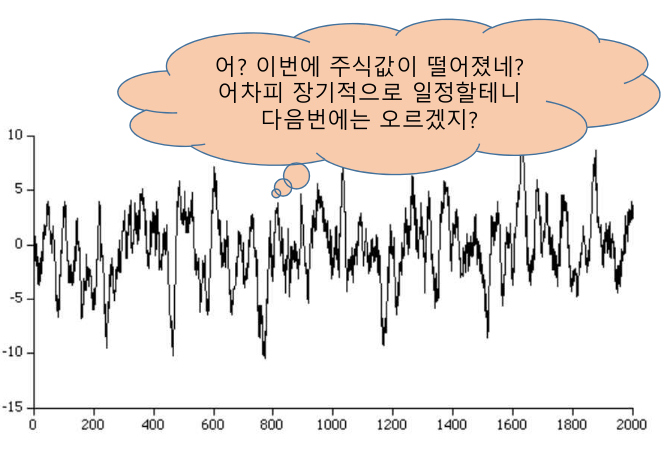

- 과거 값들에 대한 회귀를 통해 미래 값 예측

- Yt가 이젠 p개의 데이터의 가중합으로 수렴

- 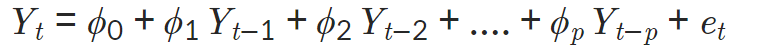

   - AR은 시계열의 Residual에 해당부분 모델링한다.
   
   - 가중치의 크기가 1보다 작은 가중합으로 수렴
   
   - 주식 시계열을 모델링한다.(균형 맞추기)
   
   
2. MA(이동평균, Moving Average)

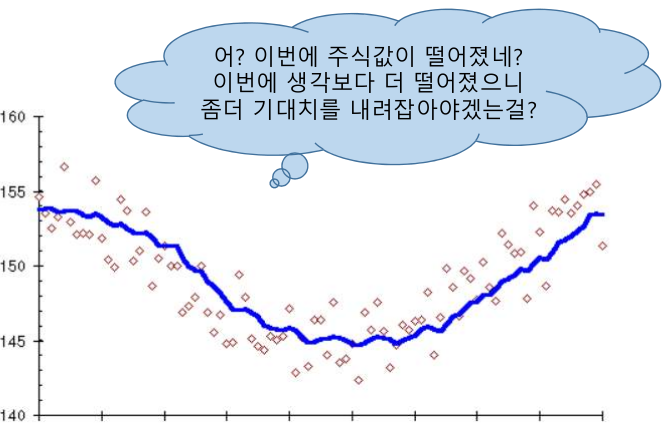

- MA는 Yt가 이전 q개의 예측오차값의 가중합으로 수렴

- 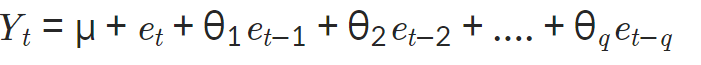

   - MA는 시계열의 Trend에 해당 부분 모델
   
   - 예측오차값 > 0, 관측값이 높으니 예측치 높이자
   
   - 주식값이 증감패턴 지속 관점(추세적 증감)
   
3. I(차분, Integration)

- I는 Yt이 이전 데이터와 d차 차분의 누적 합

   - I는 시계열의 Seasonality해당 부분 모델링
   
### ARIMA 모델 p,q,d(모수)

- 모수: 핵심적인 숫자들을 정하기

- p: 자기회귀 모형(AR)시차(BY PACF)

- q: 이동평균 모형(MA)시차(BY ACF)

- d: 차분누적(I)횟수

- 모수 선택법

   - ACF(Autocorrelation Function)
   
     - 시차에 따른 관측치들 사이의 관련성 측정
     
     - 주어진 시계열의 현재 값이 과거 값과 상관성 섦여
     
     - ACF  plot에서 X축은 상관계수 나타내고 y축은 시차 수
     
     
   
   - PACF(Partial Autocorrelation Function)
   
     - 다른 관측치의 영향력 배제한 후 두 시차의 관측치 간 관련성 측정
     
     - k이외의 모든 시차를 갖는 관측치의 영향력 배제 후 특정 두 관측치가 얼마나 관련 있는지 나타냄
   

### 시계열 예시



In [1]:
! mkdir -p ~/aiffel/stock_prediction/data
! ln -s ~/data/* ~/aiffel/stock_prediction/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

print('슝=3')

슝=3


#### 데이터: Daily Minimum Temperatures in Melbourne

- 시간 컬럼을 index로 하는 Series로 표현

In [3]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [6]:
ts1 = df['Temp']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

### 시계열 안정성 분석

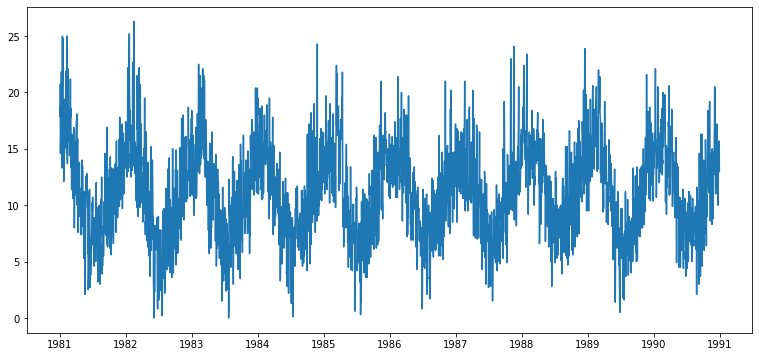

In [9]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

#### 결측치 처리 방식

1. drop을 통해서 결측치가 있는 데이터 삭제

2. 결측치 양옆의 값들을 이용하여 적절히 보간하여 대입

In [8]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

Series([], Name: Temp, dtype: float64)


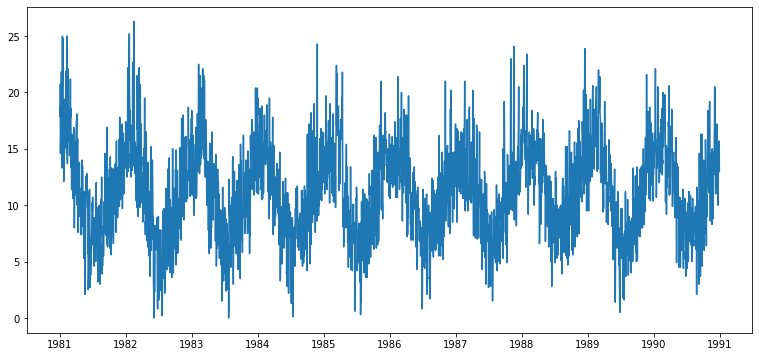

In [10]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

#### 시각화



1. 구간의 평균(rolling mean, 이동평균)
2. 표준편차(rolling std, 이동표준편차)

In [11]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


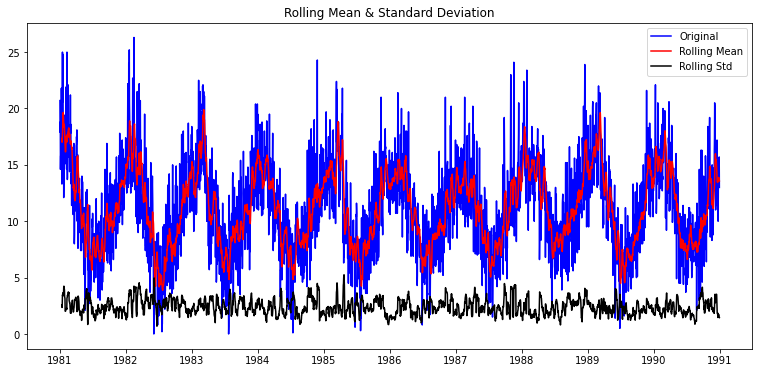

In [12]:
plot_rolling_statistics(ts1, window=12)

#### 데이터: International airline passengers 

In [13]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


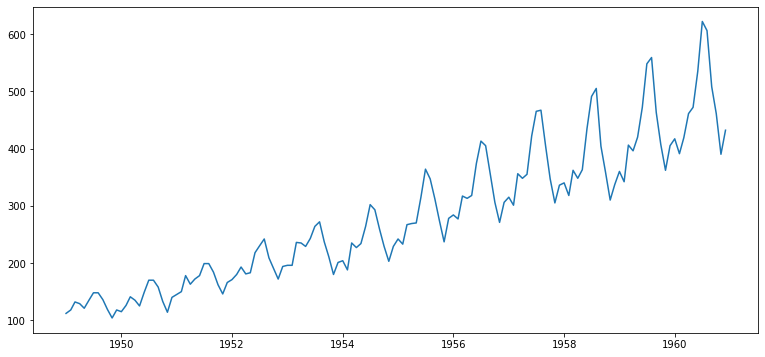

In [14]:
# 시계열의 평균과 분산이 커지는 패턴
ts2 = df['Passengers']
plt.plot(ts2)

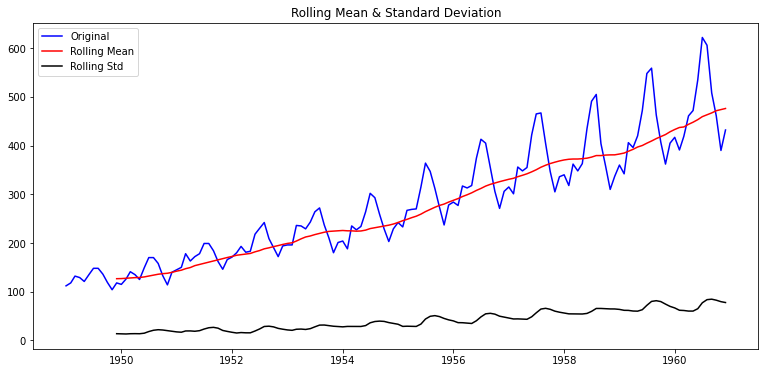

In [15]:
# rolling statistics 추가
plot_rolling_statistics(ts2, window=12)

#### Code of statsmodels 패키지와 adfuller 메소드


In [16]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [17]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [18]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


#### 안정성 만들기

- 로그 변환

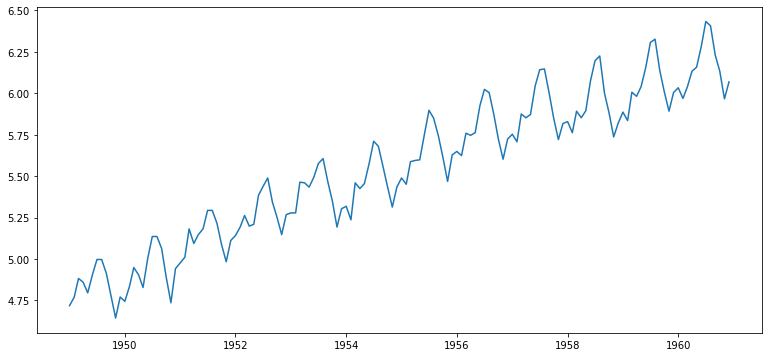

In [19]:
ts_log = np.log(ts2)
plt.plot(ts_log)

#### Moving average 제거- 추세 상쇄하기

In [20]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


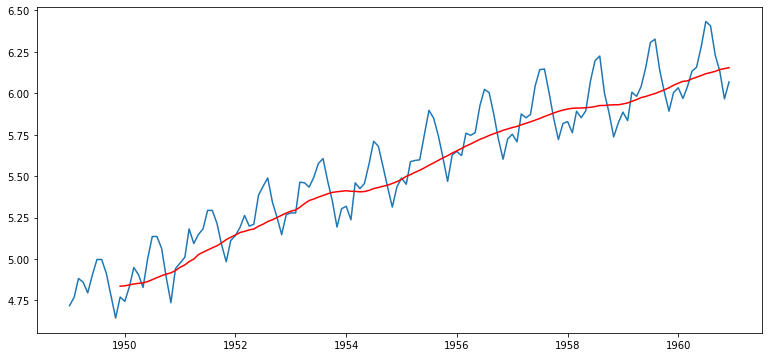

In [21]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [22]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [23]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

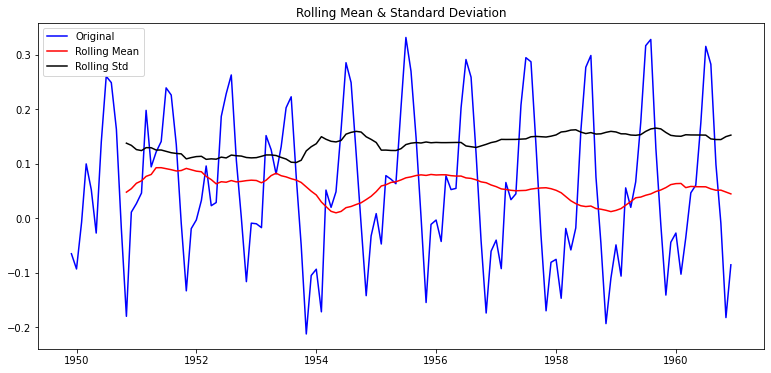

In [26]:
# 정량적 분석
plot_rolling_statistics(ts_log_moving_avg)

In [27]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


#### 차분(Differencing) - 계절성(Seasonality) 상쇄하기

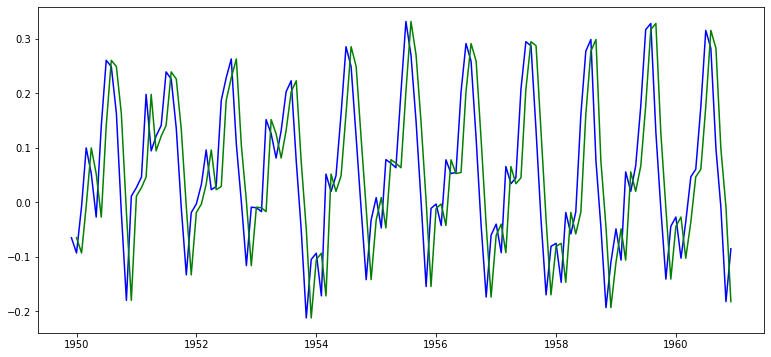

In [28]:
#시프트한 시계열과 원본 시계열

ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

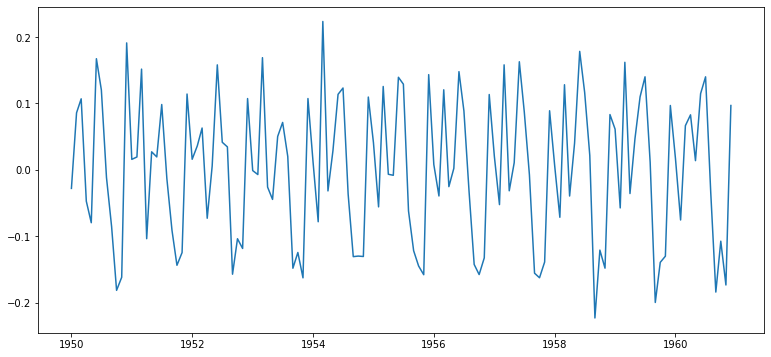

In [29]:
# 원본 - 시프트한 시계열 값
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

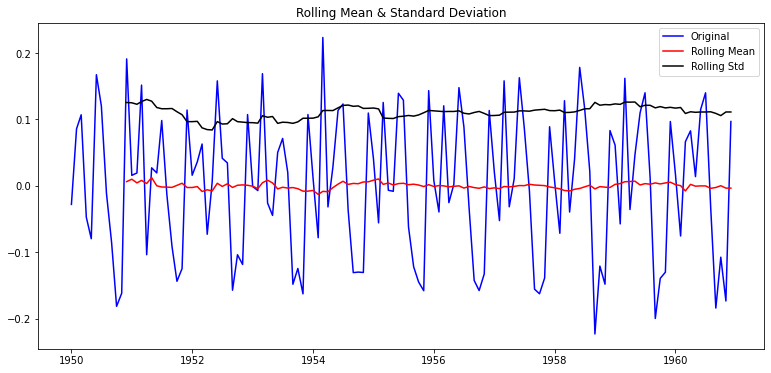

In [30]:
# 이동 평균, 이동표준 편차를 그래프화
plot_rolling_statistics(ts_log_moving_avg_diff)

In [31]:
# 차분효과


augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


####  시계열 분해(Time series decomposition)


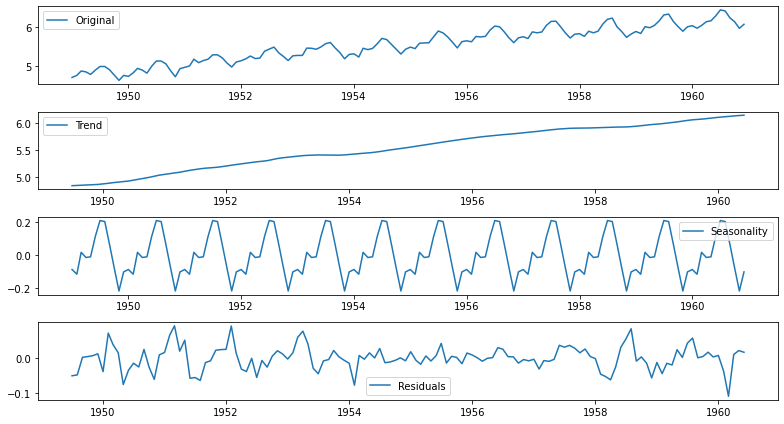

In [33]:
# 로그 변환
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

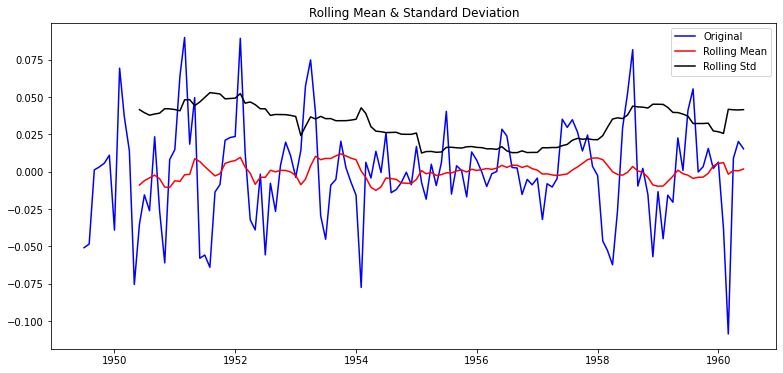

In [34]:
# residual 안정성 여부
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [35]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


## ARIMA 모수



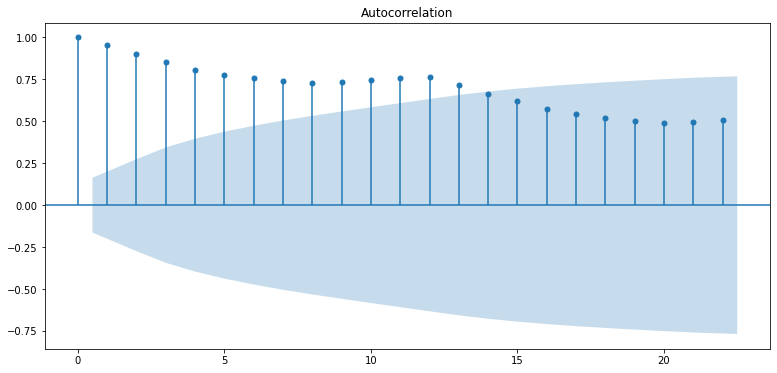

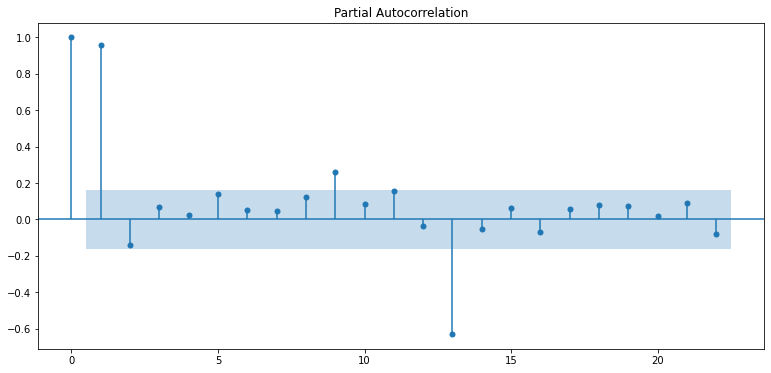

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


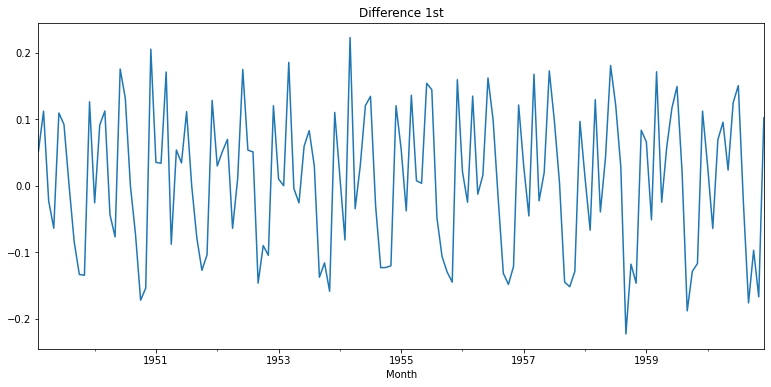

In [38]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


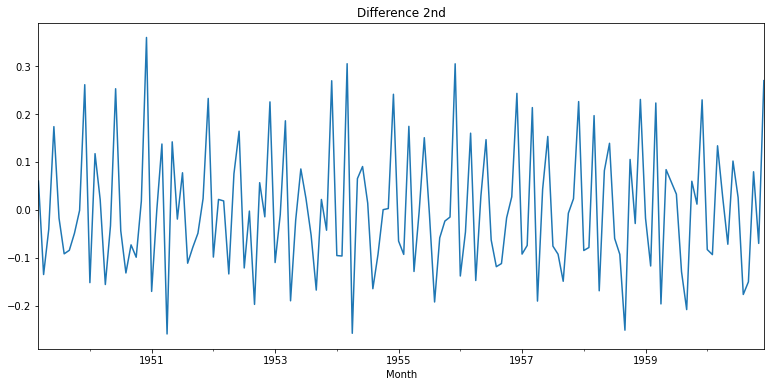

In [39]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### 학습데이터 분리

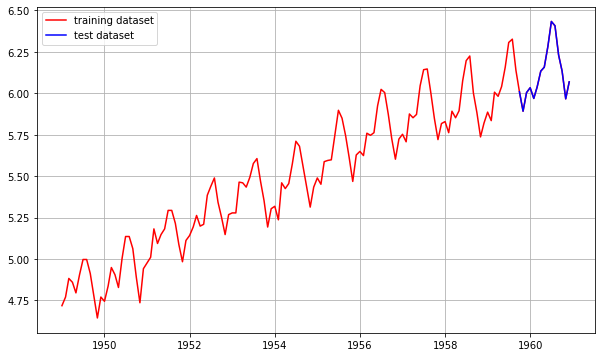

In [40]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [41]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


#### ARIMA 모델 훈련과 추론

- p = 1, d =1, q = 0

In [42]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 107.558
Date:                Thu, 11 Nov 2021   AIC                           -211.117
Time:                        02:18:18   BIC                           -205.413
Sample:                    01-01-1949   HQIC                          -208.799
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1853      0.100      1.852      0.064      -0.011       0.381
sigma2         0.0109      0.002      5.815      0.000       0.007       0.015
Ljung-Box (L1) (Q):                   0.07   Jarque-

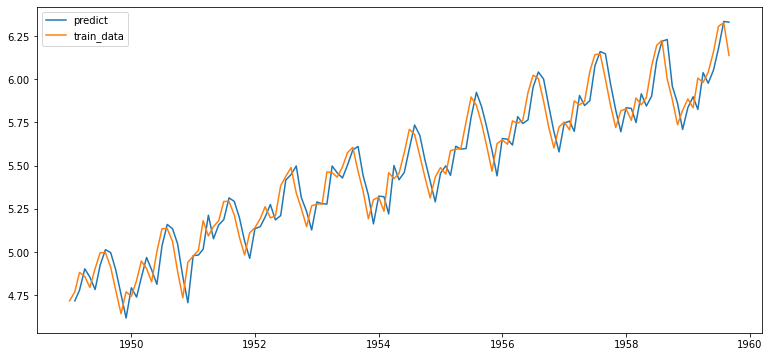

In [43]:
#결과 시각화
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

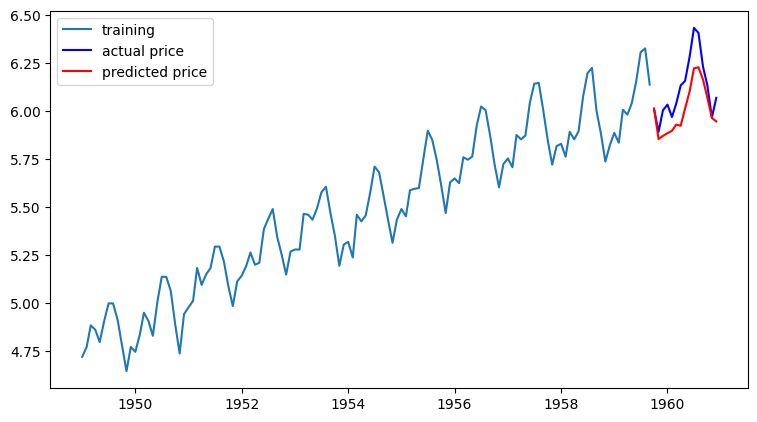

In [44]:
# forcast()메소드 이용하여 테스트 데이터 구간의 데이터 예측

model = ARIMA(train_data, order=(10, 1, 0))  # p값을 10으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [45]:
#오차 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  3749.5395750523307
MAE:  50.80662017710914
RMSE:  61.233484100223556
MAPE: 10.42%
